        date                                               text    source  \
0 2025-01-10  The new distance-based fare makes short trips ...   Twitter   
1 2025-01-12  This system is confusing and unfair. I pay mor...    Reddit   
2 2025-01-15  Can someone explain how it works? Seems compli...  Facebook   
3 2025-01-20        It’s okay but not great for long commuters.    Survey   
4 2025-01-25  Good initiative, but implementation needs impr...   Twitter   

  sentiment  
0  Positive  
1  Negative  
2  Negative  
3   Neutral  
4  Positive  


<Figure size 1000x600 with 0 Axes>

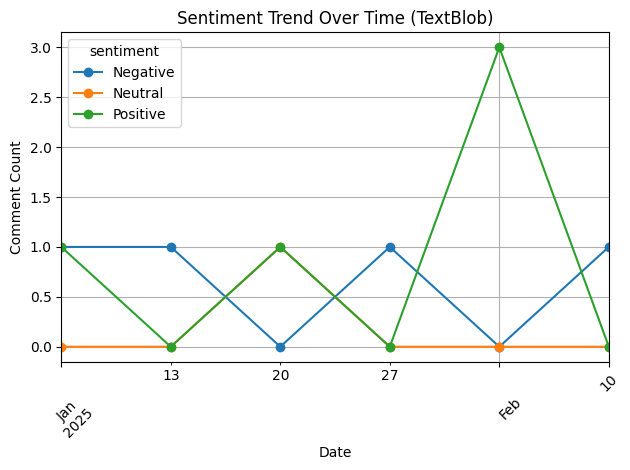

In [1]:
# Fallback: Using TextBlob for sentiment analysis instead of VADER

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("fare_sentiment_sample.csv")

# Apply sentiment analysis using TextBlob
def classify_sentiment_blob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(classify_sentiment_blob)
df["date"] = pd.to_datetime(df["date"])

# Group by week and sentiment
sentiment_over_time = df.groupby([df["date"].dt.to_period("W"), "sentiment"]).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

# OPTIONAL: Preview the processed data
print(df.head())

# Plot sentiment trend
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time (TextBlob)")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
